<a href="https://colab.research.google.com/github/FooolyHARD/AI_Lab6/blob/main/AI_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np

# Загрузка данных из файла
df = pd.read_csv('sample_data/DATA (1).csv')

# Определяем порог для успешности
threshold = 2  # Предположим, что 2 и выше считается успешным

# Создаем новый столбец 'SUCCESSFUL', где 1 - успешный, 0 - неуспешный
df['SUCCESSFUL'] = df['GRADE'].apply(lambda x: 1 if x >= threshold else 0)

print(df)



     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  24  25  26  27  28  29  30  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   3   2   1   2   1   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   3   2   3   2   2   3   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   2   2   1   1   2   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   2   3   2   2   1   3   2   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   1   2   2   2   1   2   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   2   1   2   1   3   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   3   2   2   1   5   3   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   3   3   2   1   4   3   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   1   2   1   2   1   5   3   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   1   3   2   3   1   5   4   

     COURSE ID  GRADE  SUCCESSFUL  
0            1 

In [26]:
import random

# Получаем список признаков (кроме 'STUDENT ID' и 'GRADE')
features = df.columns[1:-1].tolist()

# Определяем количество случайных признаков (sqrt(n))
num_features = int(len(features) ** 0.5)

# Выбираем случайные признаки
random_features = random.sample(features, num_features)

print("Случайные признаки:", random_features)


Случайные признаки: ['2', '12', '3', '22', '8']


In [51]:
class TreeNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature  # Индекс признака
        self.threshold = threshold  # Пороговое значение для деления
        self.left = left  # Левое поддерево
        self.right = right  # Правое поддерево
        self.value = value  # Значение (для листового узла)

def build_decision_tree(data, features):
    # Рекурсивная функция построения дерева
    if len(set(data['SUCCESSFUL'])) == 1:
        # Если все значения одинаковы, создаем листовой узел
        return TreeNode(value=data['SUCCESSFUL'].iloc[0])

    if not features:
        # Если закончились признаки, создаем листовой узел с наиболее часто встречающимся значением
        return TreeNode(value=data['SUCCESSFUL'].mode().iloc[0])

    # Выбираем лучший признак и порог для деления
    best_feature, best_threshold = find_best_split(data, features)

    # Делим данные на две части
    left_data = data[data[best_feature] <= best_threshold]
    right_data = data[data[best_feature] > best_threshold]

    # Рекурсивно строим левое и правое поддерево
    left_tree = build_decision_tree(left_data, features)
    right_tree = build_decision_tree(right_data, features)

    # Возвращаем узел с информацией о разделении
    return TreeNode(feature=best_feature, threshold=best_threshold, left=left_tree, right=right_tree)

def find_best_split(data, features):
    # Выбираем признак и порог, минимизирующие индекс Джини
    best_feature = None
    best_threshold = None
    best_gini = float('inf')

    for feature in features:
        thresholds = sorted(set(data[feature]))
        for threshold in thresholds:
            left_data = data[data[feature] <= threshold]
            right_data = data[data[feature] > threshold]

            gini = calculate_gini(left_data['SUCCESSFUL'], right_data['SUCCESSFUL'])

            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(left_values, right_values):
    # Вычисляем индекс Джини
    left_size = len(left_values)
    right_size = len(right_values)
    total_size = left_size + right_size

    gini_left = 1 - sum((left_values.value_counts() / left_size) ** 2)
    gini_right = 1 - sum((right_values.value_counts() / right_size) ** 2)

    gini = (left_size / total_size) * gini_left + (right_size / total_size) * gini_right

    return gini

# Пример использования
tree = build_decision_tree(df.drop('STUDENT ID', axis=1), ['1', '2', '3', 'SUCCESSFUL'])



def predict(tree, sample):
    # Рекурсивная функция для прогнозирования успешности
    if tree.value is not None:
        return tree.value

    if sample[tree.feature] <= tree.threshold:
        return predict(tree.left, sample)
    else:
        return predict(tree.right, sample)

# Пример использования для прогнозирования успешности на тестовых данных
test_data = {
    '1': [1, 2, 2, 1, 3, 3, 1, 2, 2, 3, 1],
    '2': [2, 3, 2, 1, 3, 2, 1, 2, 3, 2, 1],
    '3': [3, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1],
    'SUCCESSFUL': [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]  # Примеры успешности для тестирования
}

test_df = pd.DataFrame(test_data)

# Прогнозируем успешность
predictions = test_df.apply(lambda row: predict(tree, row), axis=1)

# Добавляем прогнозы к тестовым данным
test_df['PREDICTION'] = predictions

print(test_df)




    1  2  3  SUCCESSFUL  PREDICTION
0   1  2  3           1           1
1   2  3  2           0           0
2   2  2  2           1           1
3   1  1  1           0           0
4   3  3  1           1           1
5   3  2  3           0           0
6   1  1  2           0           0
7   2  2  2           1           1
8   2  3  1           1           1
9   3  2  1           1           1
10  1  1  1           0           0


In [52]:
# Функция для вычисления Accuracy
def accuracy(y_true, y_pred):
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_samples = len(y_true)
    return correct_predictions / total_samples

# Функция для вычисления Precision
def precision(y_true, y_pred):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    predicted_positives = sum(1 for pred in y_pred if pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0

# Функция для вычисления Recall
def recall(y_true, y_pred):
    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    actual_positives = sum(1 for true in y_true if true == 1)
    return true_positives / actual_positives if actual_positives > 0 else 0

# Пример использования
y_true = test_df['SUCCESSFUL'].tolist()
y_pred = test_df['PREDICTION'].tolist()

# Вычисление метрик
acc = accuracy(y_true, y_pred)
prec = precision(y_true, y_pred)
rec = recall(y_true, y_pred)

# Вывод результатов
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0


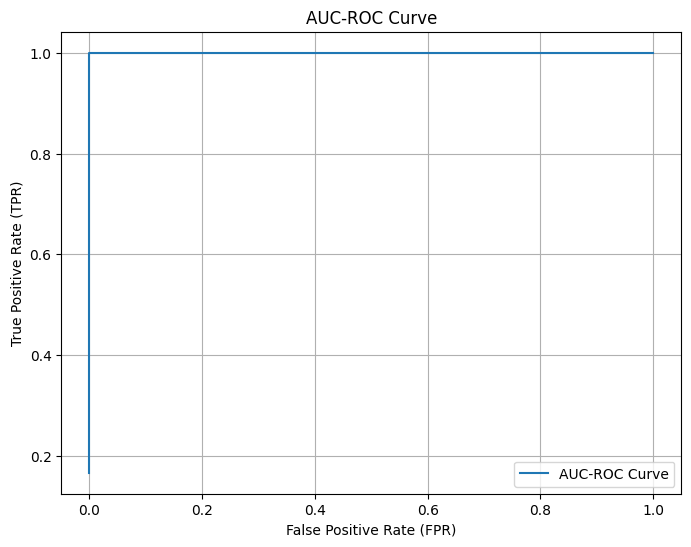

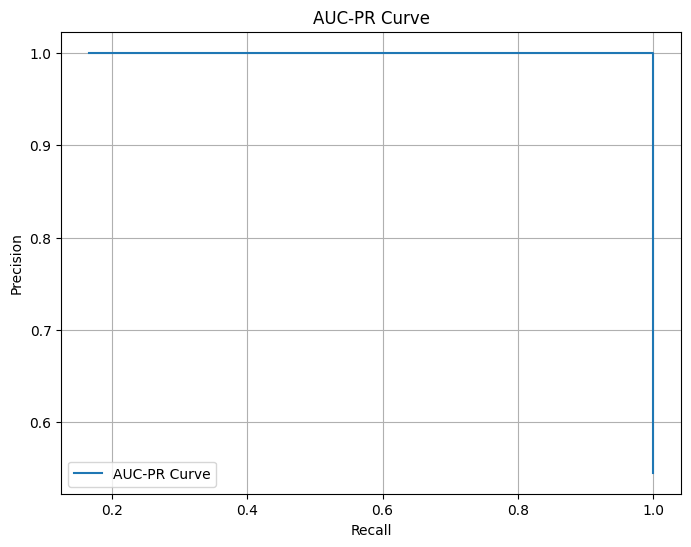

In [54]:
import matplotlib.pyplot as plt

# Функция для вычисления TPR и FPR
def calculate_tpr_fpr(y_true, y_scores, threshold):
    y_pred = [1 if score >= threshold else 0 for score in y_scores]

    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    true_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 0)
    false_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)

    tpr = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0

    return tpr, fpr

# Функция для вычисления Precision и Recall
def calculate_precision_recall(y_true, y_scores, threshold):
    y_pred = [1 if score >= threshold else 0 for score in y_scores]

    true_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 1)
    false_positives = sum(1 for true, pred in zip(y_true, y_pred) if true == 0 and pred == 1)
    false_negatives = sum(1 for true, pred in zip(y_true, y_pred) if true == 1 and pred == 0)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    return precision, recall

# Пример данных
y_true = [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0]  # Пример фактических значений
y_scores = [0.8, 0.2, 0.6, 0.1, 0.9, 0.3, 0.4, 0.7, 0.95, 0.8, 0.1]  # Пример вероятностей

# Генерация пороговых значений
thresholds = sorted(set(y_scores))

# Инициализация списков для хранения значений TPR, FPR, Precision и Recall
tprs = []
fprs = []
precisions = []
recalls = []

# Вычисление TPR, FPR, Precision и Recall для каждого порога
for threshold in thresholds:
    tpr, fpr = calculate_tpr_fpr(y_true, y_scores, threshold)
    precision, recall = calculate_precision_recall(y_true, y_scores, threshold)

    tprs.append(tpr)
    fprs.append(fpr)
    precisions.append(precision)
    recalls.append(recall)

# Построение кривой AUC-ROC
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='AUC-ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Построение кривой AUC-PR
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='AUC-PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUC-PR Curve')
plt.legend()
plt.grid(True)
plt.show()
